In [1]:
from rasa_nlu.training_data import load_data

/home/yurio/anaconda3/envs/rasa_16/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yurio/anaconda3/envs/rasa_16/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yurio/anaconda3/envs/rasa_16/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yurio/anaconda3/envs/rasa_16/lib/python3

In [2]:
!ls data

nlu.json  nlu.md  stories.md


In [ ]:
# import json

# with open('data/nlu.json', 'w') as json_file:
#     json.dump(data.as_json(), json_file)

In [ ]:
# train, test = data.train_test_split(train_frac=0.8)

In [ ]:
# print(train.as_json())

In [ ]:
# print(test.as_json())

In [ ]:
# print(train.as_markdown())

In [ ]:
# file1 = open("./data/train_nlu.md","a")
# for l in train.as_markdown():
#     file1.writelines(l) 
# file1.close()

In [ ]:
# print(test.as_markdown())

In [ ]:
# file1 = open("./data/test_nlu.md","a")
# for l in test.as_markdown():
#     file1.writelines(l) 
# file1.close()

### retraining on jupyter

In [3]:
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
import os

In [5]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [6]:
from rasa.core.agent import Agent

In [7]:
??rasa.train

Object `rasa.train` not found.


In [8]:
import rasa

model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Nothing changed. You can use the old model stored at '/home/yurio/kuliah/thesis_mania/mi-botway/chatbot-uii-2/models/20210502-232800.tar.gz'.
models/20210502-232800.tar.gz


In [9]:
from rasa.jupyter import chat

endpoints = "endpoints.yml"
chat(model_path, endpoints)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpowq9vw1n/nlu/component_5_EmbeddingIntentClassifier.ckpt


/home/yurio/anaconda3/envs/rasa_16/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Your bot is ready to talk! Type your messages here or send '/stop'.
assalamu alaikum
hai saya chatbot uii, bisa saya bantu
cek jadwal
untuk konsentrasi atau prodi apa ?
ds
cek cuaca
boleh tau kota atau kabupatennya dimana ?
surakarta
/stop


In [10]:
import rasa.data as data
stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)
print(stories_directory, nlu_data_directory)

/tmp/tmpu_h23uxp /tmp/tmpilqb4hqg


In [11]:
model_path

'models/20210502-232800.tar.gz'

In [12]:
stories_directory

'/tmp/tmpu_h23uxp'

In [13]:
nlu_data_directory

'/tmp/tmpilqb4hqg'

In [14]:
??rasa.test

100%|██████████| 15/15 [00:00<00:00, 50.62it/s]


INFO:tensorflow:Restoring parameters from /tmp/tmp0mqpt3yq/nlu/component_5_EmbeddingIntentClassifier.ckpt


100%|██████████| 693/693 [00:01<00:00, 669.35it/s] 


Done testing.


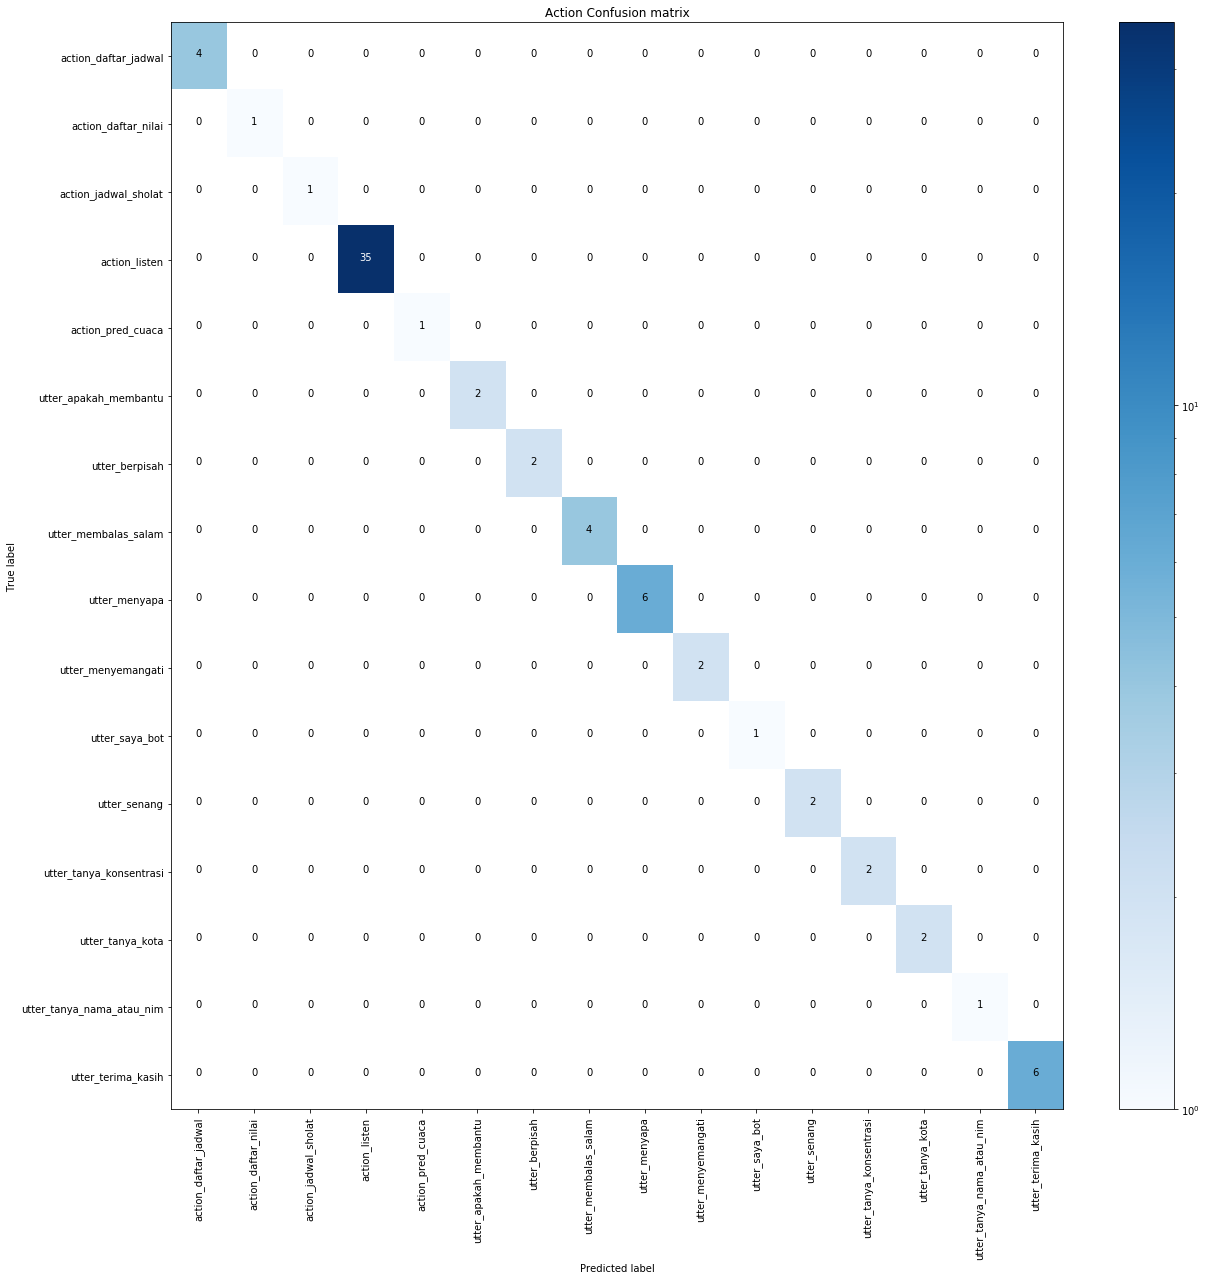

In [15]:
rasa.test(model_path, stories_directory, nlu_data_directory)
print("Done testing.")

In [16]:
!ls results/

CRFEntityExtractor_report.json	failed_stories.md      intent_report.json
entity_nlu_report.csv		intent_nlu_report.csv  story_confmat.pdf


In [ ]:
import pandas as pd
import json

In [ ]:
with open('results/CRFEntityExtractor_report.json', 'r') as json_file:
    tes = json.load(json_file)

In [ ]:
df_tes_entity = pd.DataFrame(tes)

In [ ]:
df_tes_entity.to_csv('results/entity_nlu_report.csv')

In [ ]:
with open('results/intent_report.json', 'r') as json_file:
    tes_nlu = json.load(json_file)

In [ ]:
df_tes_nlu = pd.DataFrame(tes_nlu)

In [ ]:
df_tes_nlu.to_csv('results/intent_nlu_report.csv')

In [ ]:
data = load_data('./data/nlu.md')

In [ ]:
with open('data/nlu.json', 'w') as json_file:
    json.dump(data.as_json(), json_file)

In [ ]:
with open('data/nlu.json', 'r') as json_file:
    data_nlu = json.load(json_file)

In [ ]:
data_nlu_js = json.loads(data_nlu)

In [ ]:
df_data = pd.DataFrame(data_nlu_js['rasa_nlu_data']['common_examples'])

In [ ]:
df_data.head()

In [ ]:
df_data[df_data.entities.notnull()]['intent'].unique()

In [ ]:
df_data.loc[df_data['intent'] == 'intent_minta_jadwal']

In [ ]:
df_data.loc[df_data['intent'] == 'intent_minta_jadwal_saja']

In [ ]:
df_data['intent'].unique()

In [ ]:
len(df_data['intent'].unique())

In [ ]:
type(df_data['entities'][0])